# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [1]:
# Cargamos las librerías necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos, con la peculiaridad de que se emplea ";" como separación de los datos:
df = pd.read_csv("Datos/sample_NYC_parking_issues.csv", sep = ";")

# Hacemos típica observación de los datos.
df.shape
df.columns
df.head()

# Aplicamos un filtro en todas las observaciones de NA.
print(df.isna().all().sum())   
    # isna() indica True o False para cada observación en cada variable si es NA o no.
    # all() aplica True si todos los elementos de un vector son True.

# Eliminamos las columnas que cumplen con el filtro:
dfA = df.drop(columns=df.columns[df.isna().all()])

# Comprobación de columnas NA:
print(dfA.isna().all().any())
    # any() proporciona True si algún elemento de un vector es True.

3
False


### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [2]:
# Observamos todas las fechas de la variable:
print(dfA.value_counts("Vehicle Year").sort_index())

# Eliminamos las filas que contengan el año 0 y 2069 (no tienen sentido si suponemos que se tratan del año de
# fabricación del vehículo) mediante un filtro con el operador lógico "or" de numpy:
dfB = dfA.drop(dfA[np.logical_or(dfA["Vehicle Year"] == 0, dfA["Vehicle Year"] == 2069)].index)

# Transformamos la columna a números enteros:
dfB["Vehicle Year"] = dfB["Vehicle Year"].astype("int64")

# Comprobamos que se han transformado correctamente los valores a enteros:
print(dfB["Vehicle Year"].dtype)

Vehicle Year
0.0       2693
1980.0       1
1982.0       3
1983.0       2
1984.0       4
1985.0       9
1986.0      15
1987.0      24
1988.0      31
1989.0      21
1990.0      21
1991.0       9
1992.0      24
1993.0      28
1994.0      49
1995.0      96
1996.0      94
1997.0     141
1998.0     154
1999.0     203
2001.0     289
2002.0     335
2003.0     341
2004.0     396
2005.0     410
2006.0     459
2007.0     533
2008.0     472
2009.0     360
2010.0     431
2011.0     546
2012.0     682
2013.0     848
2014.0     271
2015.0       4
2069.0       1
Name: count, dtype: int64
int64


### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [3]:
# Primero miramos que no haya valores NA en la variable y en caso de haber las eliminamos:
print(dfB["Vehicle Make"].isna().any())

# Eliminamos los valores nulos ya que no guardan tampoco sentido con ninguna marca real, es desconocida.
dfC1 = dfB.drop(dfB[dfB["Vehicle Make"].isna()].index)

# Observamos las marcas potenciales que hay en dicha variable:
print(dfC1.value_counts("Vehicle Make").index)

# Podríamos pensar que las marcas no válidas son aquellas cuya frecuencia es muy baja, es decir, es poco probable que se indique una misma marca 
# falsa dos veces. No obstante, aquí existen marcas reales que han sido registradas una única vez y existen marcas falsas que han sido registradas
# más de una vez, por lo que no sería un criterio adecuado.
dfC1.value_counts("Vehicle Make", ascending=True)

# Cabe destacar que existen marcas mal abreviadas, todo y que pueden identificarse ciertamente. Por lo que, nos podría interesar eliminar aquellas
# marcas en las que estamos seguros que son falsas, donde su abreviatura no coincide aparentemente con una marca real. Podríamos comprobar una por
# una en google si guardan una relación real pero no es el objetivo verdadero de esta entrega, por lo que las marcas ficticias propuestas 
# por ChatGPT son:
marcas_ficticias = [
    "ME/BE", "INTER", "FRUEH", "NS/OT", "WORKH", "UTIL", "WORK", "MI/F", 
    "VAN H", "FR/LI", "SMITH", "FREI", "CHECK", "WO/C", "BL/B", "STARC", 
    "THD", "SZI", "FRG", "ICENE", "UPS", "UTILI", "UTITY", "VL", "W", 
    "WANC", "WOR", "FRGHT", "STAR", "CHEET", "LEXCO", "LIMO", "GIDNY", 
    "SPRI", "FRIG", "NAVIS", "FR/L", "PRATT", "PREV", "PUTEL", "SOLEC", 
    "FR L"
]

# Ahora eliminamos aquellas marcas supuestamente ficticias:
dfC = dfC1.drop(dfC1[dfC1["Vehicle Make"].isin(marcas_ficticias)].index)

# Observamos cuantas observaciones y marcas hemos eliminado a raíz de las marcas validadas:
print("Se han eliminado un total de " + str(dfC1.shape[0] - dfC.shape[0]) + " observaciones no nulas y " + str(dfB.shape[0] - dfC1.shape[0]) + " nulas.")
print("Se han eliminado un total de " + str(len(dfC1["Vehicle Make"].unique()) - len(dfC["Vehicle Make"].unique())) + " marcas.")

True
Index(['FORD', 'TOYOT', 'HONDA', 'CHEVR', 'NISSA', 'GMC', 'DODGE', 'ME/BE',
       'BMW', 'INTER', 'HYUND', 'JEEP', 'FRUEH', 'LEXUS', 'ACURA', 'LINCO',
       'VOLKS', 'CHRYS', 'INFIN', 'MITSU', 'SUBAR', 'ISUZU', 'AUDI', 'MAZDA',
       'CADIL', 'NS/OT', 'MERCU', 'VOLVO', 'KIA', 'HINO', 'WORKH', 'ROVER',
       'BUICK', 'KENWO', 'PETER', 'SATUR', 'PONTI', 'UD', 'PORSC', 'MACK',
       'JAGUA', 'MINI', 'UTIL', 'WORK', 'FIAT', 'MI/F', 'SMART', 'VAN H',
       'PLYMO', 'OLDSM', 'SAAB', 'HUMME', 'FR/LI', 'SMITH', 'SUZUK', 'FREI',
       'VESPA', 'CHECK', 'KAWAS', 'WO/C', 'BL/B', 'STARC', 'THD', 'SZI', 'FRG',
       'ICENE', 'UPS', 'UTILI', 'UTITY', 'VL', 'VOLU', 'W', 'WANC', 'WHITE',
       'WOR', 'FRGHT', 'PREVO', 'STAR', 'MCI', 'CHEET', 'KENW', 'HERCU',
       'KRYS', 'KW', 'LEXCO', 'LIMO', 'GIDNY', 'GEM', 'AMC', 'SPRI', 'FRIG',
       'NAVIS', 'BENTL', 'FR/L', 'PRATT', 'PREV', 'PUTEL', 'RNG R', 'SOLEC',
       'FR L'],
      dtype='object', name='Vehicle Make')
Se han eliminado un 

### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

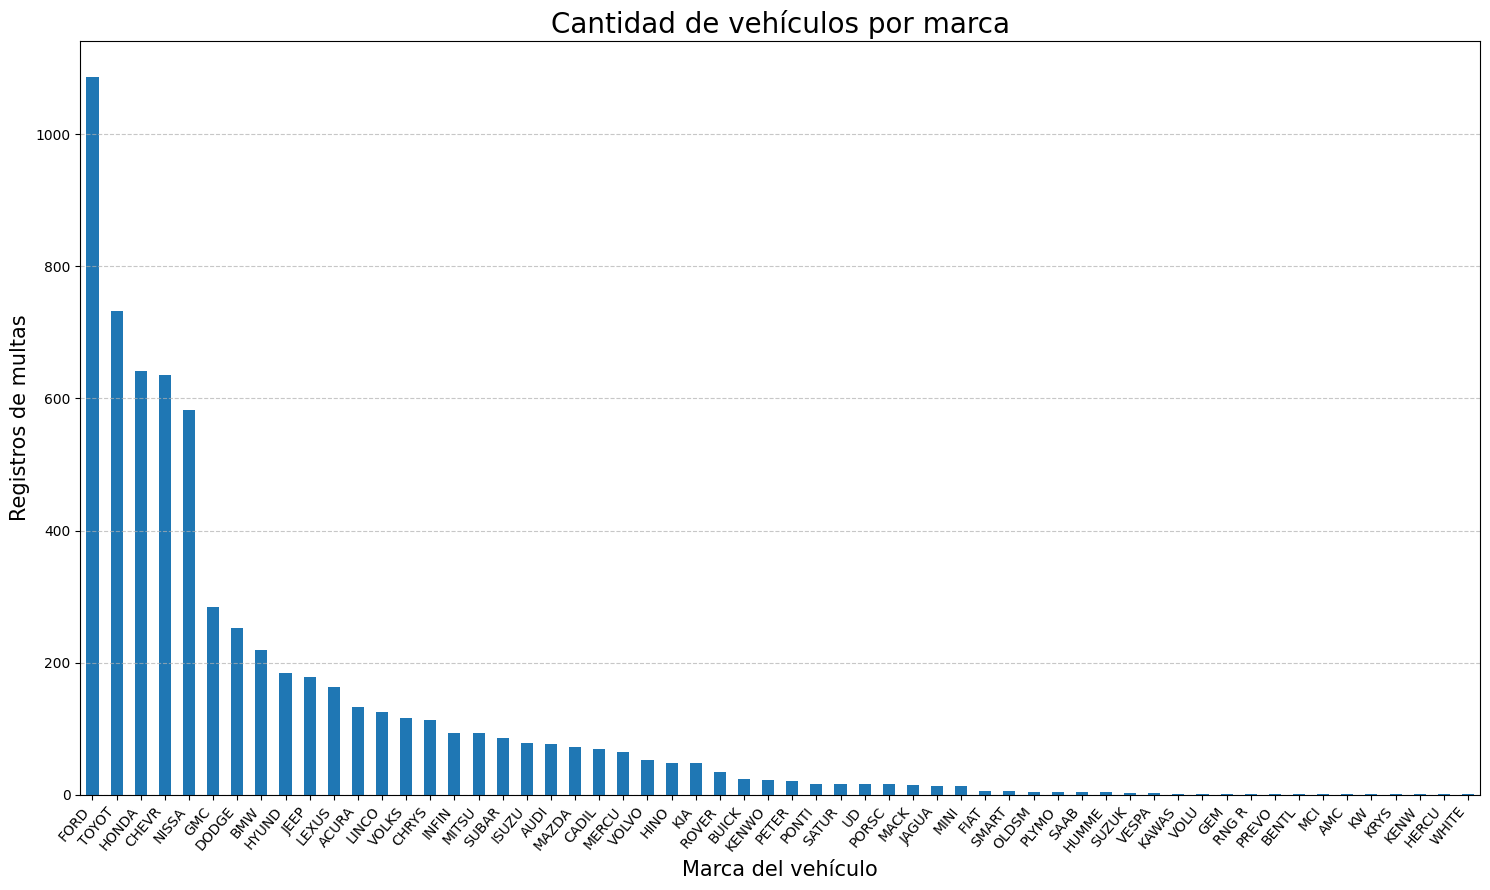

In [4]:
# Agrupamos por marcas, aplicamos el recuento, ordenamos los valores de mayor a menor y creamos el gráfico de barras:
dfC.groupby("Vehicle Make").size().sort_values(ascending=False).plot(
    kind="bar", 
    figsize=(15, 9))

# Modelamos las etiquetas del gráfico:
plt.title("Cantidad de vehículos por marca", fontsize=20)
plt.xlabel("Marca del vehículo", fontsize=15)
plt.ylabel("Registros de multas", fontsize=15)
plt.xticks(rotation=50, ha="right", fontsize=10)  # Rotamos las etiquetas del eje X.
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Agregamos una rejilla al eje Y.

# Estrechamos las etiquetas:
plt.tight_layout()

# Mostramos el gráfico:
plt.show()

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [5]:
# Creamos un df de cópia para los cambios de dicho apartado:
dfE = dfC[:].copy()
    # Aplicamos copy() para evitar la advertencia de SettingWithCopyWarning.

# A continuación observamos que existen valores nulos, los cuáles tendremos que clasificar como "OTROS":
print(dfE["Vehicle Color"].isna().sum())

# Creamos una función para normalizar los colores:
def normalize_color(color):     # Como entrada debe recibir un supuesto color.
    # Creamos un diccionario de unificación de colores. Hay que tener en cuenta que pueden existir errores tipográficos
    # que dificulten la asignación de colores, así como la ambigüedad de la mezcla de dos colores, por lo que, no va
    # a ser exacto:
    colores = {
    "WHITE": ["WH", "WHI", "WHIT", "WHT", "WHR", "WTH", "WT", "WH-BL", "WH/", 'W', 'WGUTE'],
    "BLACK": ["BL", "BLK", "BK", "BL/B", "BLK/B", "BKJ", 'DK/'],
    "RED": ["RD", "RED", "R", "RD/", "MR",'DKR', 'RB'],
    "BLUE": ["BLU", "BLUE", "BLGY", "BLG", "LTBL", 'DKBL', "DKB", 'BG', 'LTB'],
    "GREEN": ["GR", "GREEN", "GRN", "GREN", "LTG", "GN", 'DKG'],
    "GRAY": ["GY", "GREY", "GRY", "DKGY", "LGY", "GY-GY", "GYT", "LTGY", "GYW", "GY/", 'GYGY', 'GYTN', 'GRG', 'GRT'],
    "BROWN": ["BR", "BRN", "BROWN", 'BN', "BKBR", 'BEIGE'],
    "ORANGE": ["OR", "ORANG"],
    "SILVER": ["SIL", "SILV", "SLVR", "SILVE", "SILVR", "SL"],
    "YELLOW": ["YEL", "YELLOW", "YW", "YL", "YELLO", "YELOW", "GYBR"],
    "TAN": ["TAN", "TN", 'TNGR', 'LT/'],
    "PINK": ["PNK", 'LTP'],
    "PURPLE": ["PUR", "PURPL", 'PR'],
    "GOLD": ["GOLD", "GL", "TOPAZ"],
    "UNKNOWN": ["UNK", "UNKNOWN", "UNKNO", 'NOCL', 'NOC']
    }

    if pd.isna(color):  # Si el valor es NAN, lo asignamos como desconocido.
        return "UNKNOWN"
    for estandar, variantes in colores.items():
        if color in variantes:
            return estandar
        if color == estandar:
            return estandar
    return "OTHER"  # Si no coincide con ningún color, asignar "OTHER".

# Aplicamos la función para normalizar colores en el DataFrame mediante el método de .apply():
dfE["Vehicle Color Normalized"] = dfE["Vehicle Color"].apply(normalize_color)

# La siguiente función es la que he ido empleando para asignar colores en la unificación:
dfE[dfE["Vehicle Color Normalized"] == "OTHER"]["Vehicle Color"].value_counts().index

# Finalmente, vemos que se ha aplicado correctamente la normalización:
print(dfE["Vehicle Color Normalized"].value_counts())

32
Vehicle Color Normalized
WHITE      1789
BLACK      1696
GRAY       1459
RED         411
GREEN       248
SILVER      171
BROWN       168
TAN         158
BLUE        141
YELLOW       92
GOLD         65
OTHER        36
UNKNOWN      35
ORANGE       15
PURPLE       10
PINK          1
Name: count, dtype: int64


### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

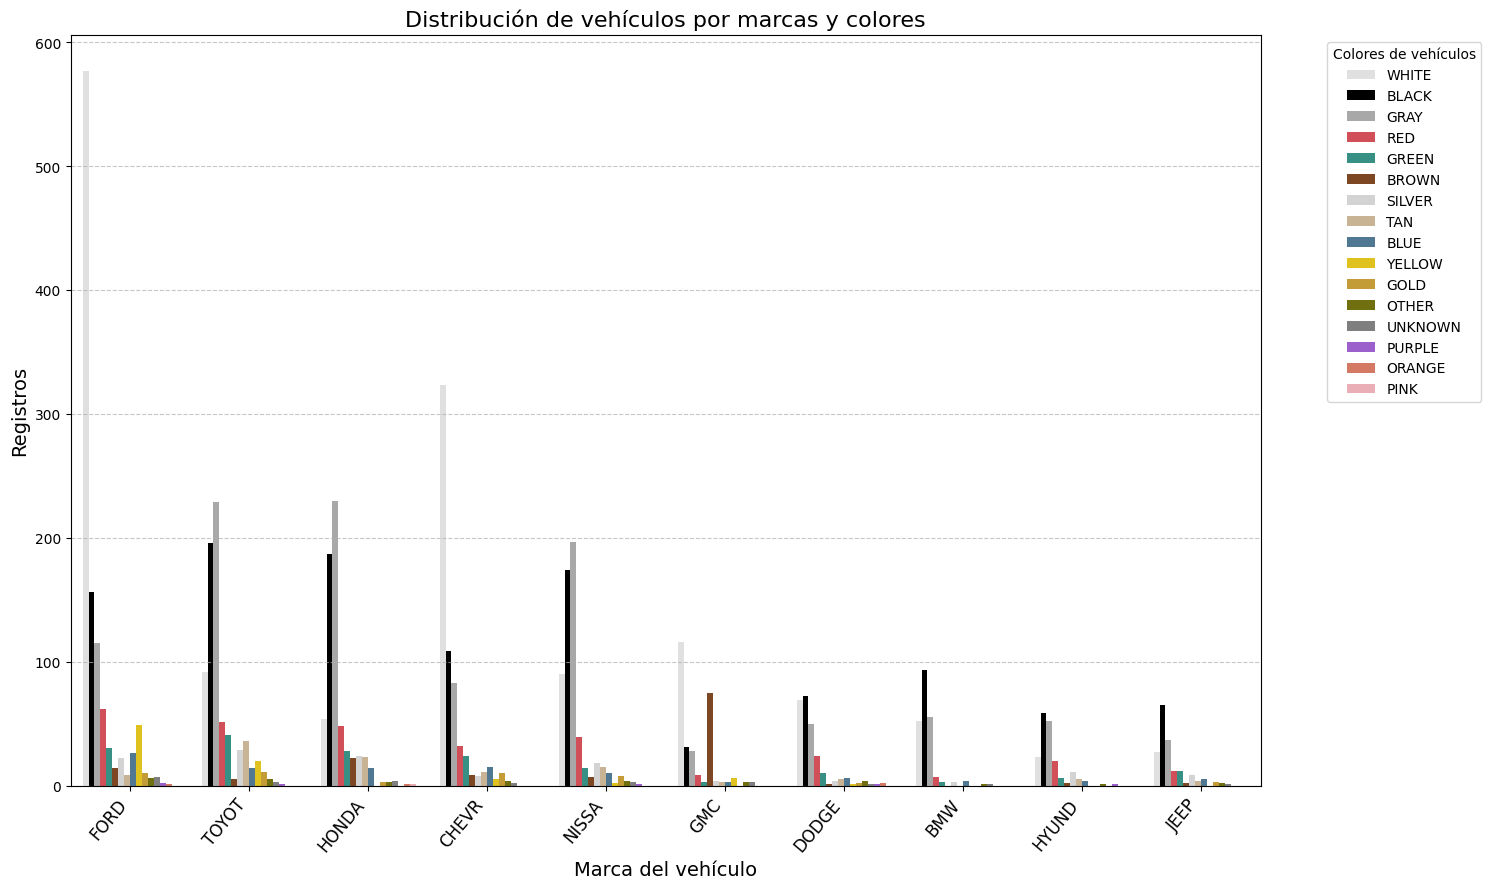

In [7]:
# Creamos el mapeo de colores:
color_mapping = {
    "WHITE": "#E0E0E0",      # Blanco ligeramente más oscuro
    "BLACK": "#000000",      
    "RED": "#E63946",        
    "BLUE": "#457B9D",       
    "GREEN": "#2A9D8F",      
    "GRAY": "#A8A8A8",       # Gris claro
    "BROWN": "#8B4513",      # Marrón fuerte
    "ORANGE": "#E76F51",     
    "SILVER": "#D3D3D3",     # Plata más oscuro
    "YELLOW": "#FFD700",     
    "TAN": "#D2B48C",        # Marrón claro para diferenciar de "BROWN"
    "PINK": "#F4A5AE",       
    "PURPLE": "#9D4EDD",     
    "GOLD": "#DAA520",       
    "UNKNOWN": "#7F7F7F",    # Gris oscuro para indicar desconocido
    "OTHER": "#808000"       # Verde oliva para "OTROS"
}

# Filtramos por las 10 marcas con más registros, dado que en la visualización de todas las marcas no se apreciarían los colores:
top_marcas = dfE["Vehicle Make"].value_counts().head(10).index

# Filtramos dfE para aquellas marcas que se enceuntran entre las más registradas de top_marcas:
dfE_top_marcas = dfE[dfE["Vehicle Make"].isin(top_marcas)]

# Aplicamos el orden de colores:
hue_order = (dfE_top_marcas["Vehicle Color Normalized"].value_counts().index.tolist())

# Creamos el gráfico de barras:
plt.figure(figsize=(15, 9))
sns.countplot(x = "Vehicle Make",
              data = dfE_top_marcas,
              hue = "Vehicle Color Normalized",
              hue_order = hue_order,
              palette = color_mapping,
              order = top_marcas)

# Modelamos las etiquetas:
plt.title("Distribución de vehículos por marcas y colores", fontsize=16)
plt.xlabel("Marca del vehículo", fontsize=14)
plt.ylabel("Registros", fontsize=14)
plt.xticks(rotation=50, ha="right", fontsize=12)  # Rotamos las etiquetas del eje X.
plt.legend(title="Colores de vehículos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Agregamos una rejilla al eje Y.

# Ajustamos los espacios:
plt.tight_layout()

# Mostramos el gráfico:
plt.show()

<Figure size 1500x900 with 0 Axes>

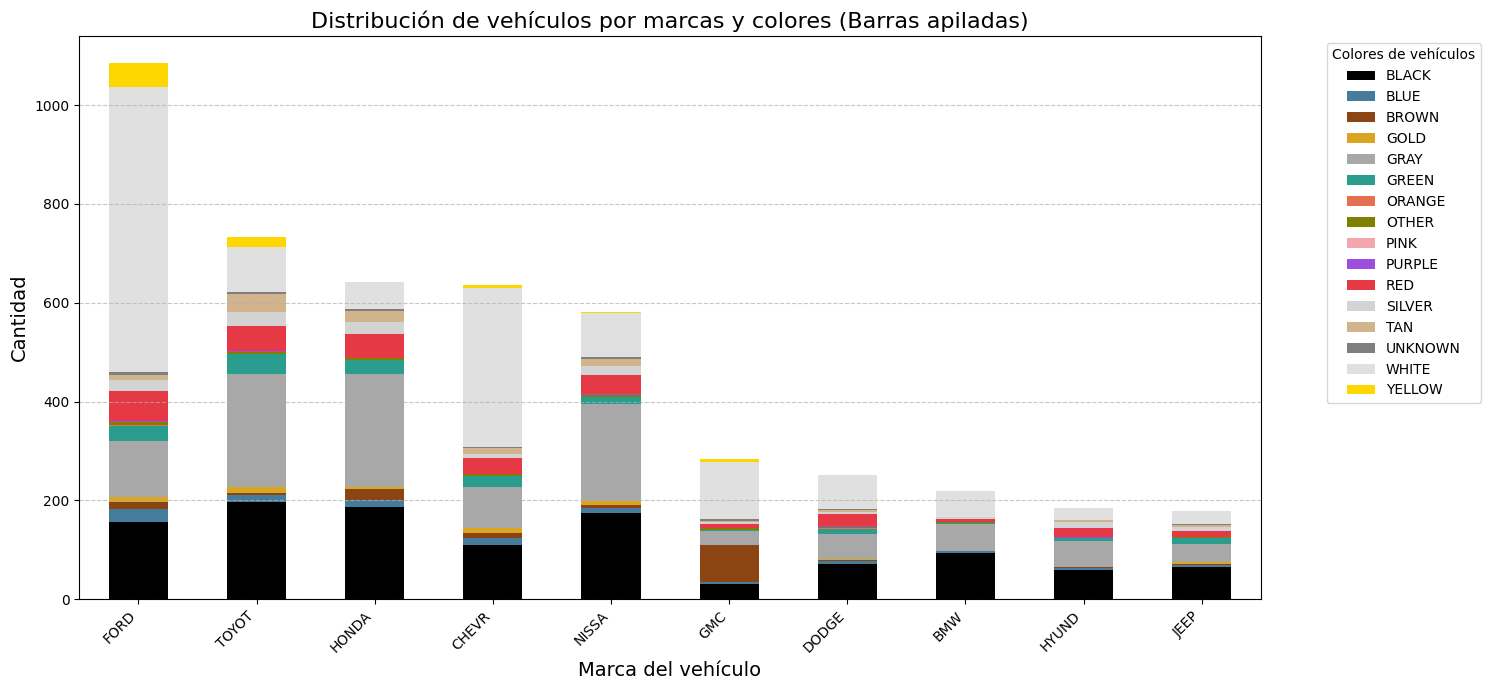

In [8]:
# También podríamos hacerlo como gráfico de barras apiladas:

# Agrupamos los datos por marca y color, y contamos las combinaciones
grouped_data = dfE_top_marcas.groupby(["Vehicle Make", "Vehicle Color Normalized"]).size().unstack(fill_value=0)

# Reordenamos las marcas según las "top marcas" seleccionadas:
grouped_data = grouped_data.loc[top_marcas]

# Creamos el gráfico de barras apiladas:
plt.figure(figsize=(15, 9))
grouped_data.plot(kind="bar", stacked=True, figsize=(15, 7), color=[color_mapping[color] for color in grouped_data.columns])

# Modelamos las etiquetas:
plt.title("Distribución de vehículos por marcas y colores (Barras apiladas)", fontsize=16)
plt.xlabel("Marca del vehículo", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="Colores de vehículos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajustamos los espacios:
plt.tight_layout()

# Mostramos el gráfico:
plt.show()


### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [9]:
# Copiamos el dfE para el ejercicio I):
dfI = dfE[:].copy()

# Transformamos a serie temporal la columna Issue Date:
dfI["Issue Date"] = pd.DatetimeIndex(dfE["Issue Date"])

# Creamos una nueva columna que indique el mes independientemente del año:
dfI["Month"] = dfI["Issue Date"].dt.month_name()

# Agrupamos por Violation Code y meses y aplicmaos el recuento:
dfI = dfI.groupby(["Month", "Violation Code"]).size().reset_index(name = "Count")
print(dfI)

# Podríamos también representarlo con un pivot_table:
dfI2 = dfI.pivot_table(index = "Violation Code", columns = "Month", values = "Count").fillna(0)

# Ordenamos los meses en el orden adecuado
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Ordenamos el pivot_table por meses adecuadamente:
dfI2 = dfI2[month_order]

dfI2


         Month  Violation Code  Count
0        April               7     50
1        April               8      1
2        April              10      2
3        April              13      9
4        April              14     46
..         ...             ...    ...
460  September              82      3
461  September              83      4
462  September              85      4
463  September              98      2
464  September              99      1

[465 rows x 3 columns]


Month,January,February,March,April,May,June,July,August,September,October,November,December
Violation Code,,,,,,,,,,,,
5,16.0,14.0,26.0,0.0,0.0,1.0,8.0,14.0,28.0,11.0,15.0,11.0
7,28.0,24.0,42.0,50.0,22.0,0.0,19.0,65.0,52.0,50.0,41.0,32.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
10,4.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,3.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
85,3.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,4.0,2.0,2.0,1.0
89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### J) Visualiza la anterior cuestión (I)

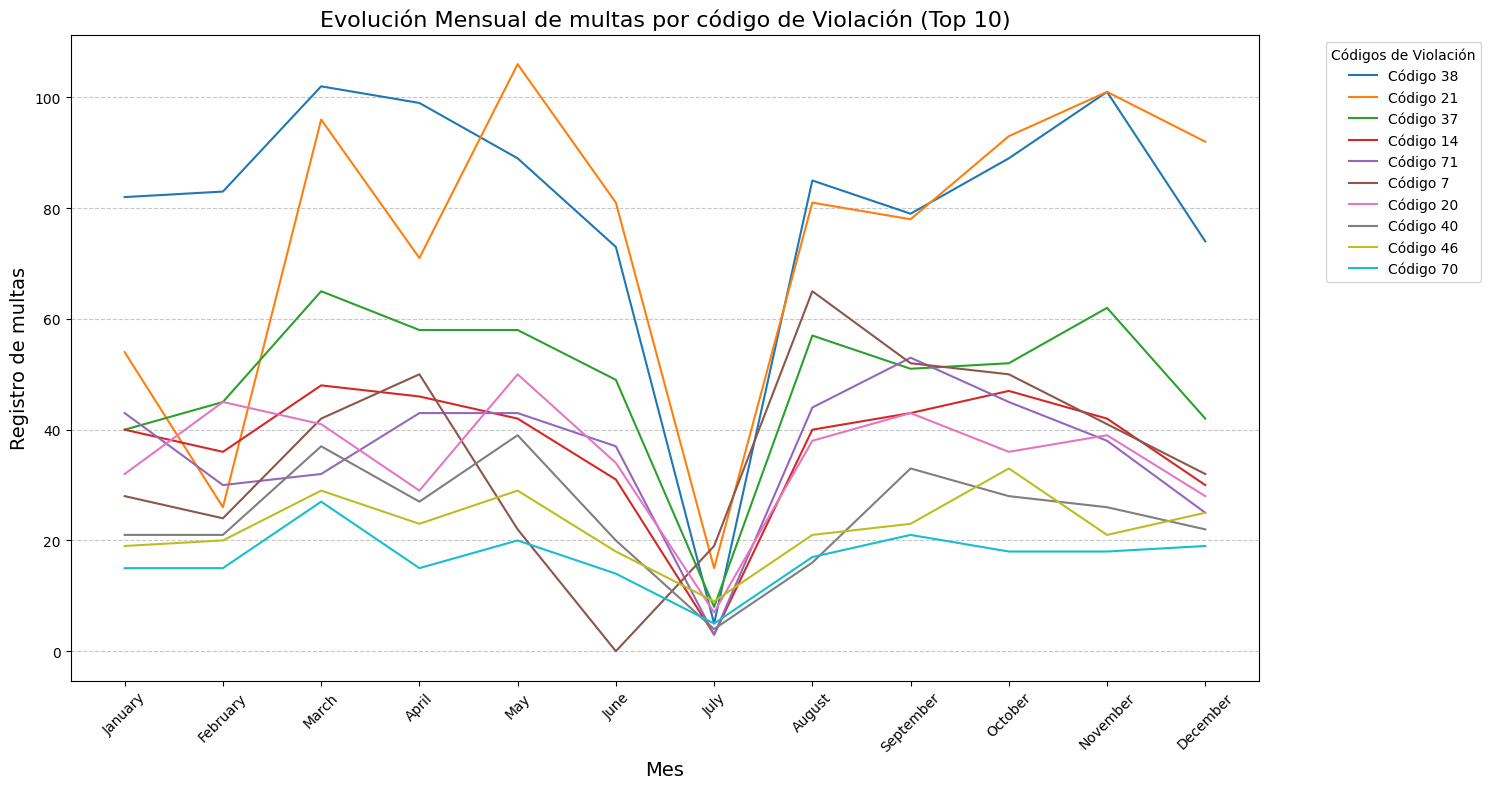

In [10]:
# Filtramos los 10 códigos de violación más frecuentes para no saturar la gráfica de líneas próximas a cero:
top_violation_codes = dfI.groupby("Violation Code")["Count"].sum().nlargest(10).index
dfJ = dfI2.loc[top_violation_codes]

# Creamos el gráfico de líneas
plt.figure(figsize=(15, 8))
for code in dfJ.index:
    plt.plot(dfJ.columns, dfJ.loc[code], label=f"Código {code}")

# Modelamos las etiquetas:
plt.title("Evolución Mensual de multas por código de Violación (Top 10)", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Registro de multas", fontsize=14)
plt.legend(title="Códigos de Violación", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajustamos los espacios:
plt.tight_layout()

# Mostramos el gráfico
plt.show()

### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'